In [117]:
%matplotlib inline

import itertools
import librosa
import librosa.display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pr_util as util
import generate_global_features_2 as gen_global

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [118]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [119]:
def create_list(labels_dict):
    class_names = [0] * len(labels_dict)
    for item in labels_dict.items():
        class_names[item[1]] = item[0]
    return class_names

def check_num_files(data_dirs, song_or_call, num_species, n_min):
    # Check if all dirs have at least n_min files

    i = 0
    while i < num_species:
        num_files = util.num_files([data_dirs[i]], song_or_call)
        print(data_dirs[i] + ' n files:' + str(num_files))
        if num_files < n_min or num_files > 40:
            data_dirs = util.choose_species(num_species)
            i = 0
        else:
            i += 1

    return data_dirs

In [120]:
n_spec = 4
dirs = util.choose_species(n_spec)
dirs = check_num_files(dirs, 'song', n_spec, 10)
labels_dict, labels, data = gen_global.generate_global_features(4, 'spec_cent', dirs, 'song', util.GLOBAL_FUNCTIONS)

/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/ n files:44
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Amazilia versicolor/ n files:11
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Attila rufus/ n files:14
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Orthogonys chloricterus/ n files:5
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Ramphastos dicolorus/ n files:27
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Scytalopus iraiensis/ n files:12
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Poospiza nigrorufa/ n files:37
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Chiroxiphia caudata/ n files:41
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Camptostoma obsoletum/ n files:39
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/ n files:44
/Users/felipefelix/USP/tcc/dataset/

In [121]:
class_names = create_list(labels_dict)
X = data
y = labels
print(labels)
print(labels_dict)
print(class_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3]
{'Cranioleuca Obsoleta': 3, 'Myiodynastes Maculatus': 2, 'Stymphalornis Acutirostris': 0, 'Procnias Nudicollis': 1}
['Stymphalornis Acutirostris', 'Procnias Nudicollis', 'Myiodynastes Maculatus', 'Cranioleuca Obsoleta']


Confusion matrix, without normalization
[[1 0 1 0]
 [0 0 3 2]
 [1 4 5 0]
 [0 0 0 3]]
Normalized confusion matrix
[[ 0.5  0.   0.5  0. ]
 [ 0.   0.   0.6  0.4]
 [ 0.1  0.4  0.5  0. ]
 [ 0.   0.   0.   1. ]]


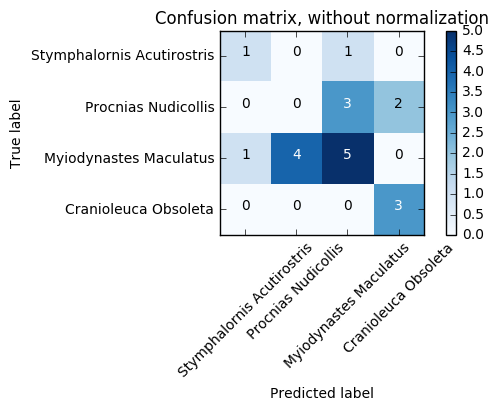

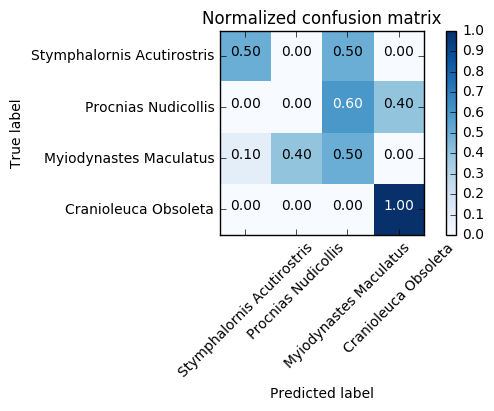

In [122]:
# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=1)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [123]:
print(y_pred)
print(y_test)

[0 3 2 2 3 3 3 2 2 3 2 2 0 1 1 2 2 2 1 1]
[2 3 2 2 1 1 3 1 2 3 1 2 0 2 2 0 1 2 2 2]


In [124]:
from sklearn.metrics import f1_score, accuracy_score

print("Ground Truth: {} ".format(y_test))
print("Predito:      {} ".format(y_pred))

f = accuracy_score(y_test, y_pred)  
print("Acurácia: {}".format(f))

f = f1_score(y_test, y_pred, average=None)  
print("F-measure para cada classe: {}".format(f))

f = f1_score(y_test, y_pred, average='macro')  
print("F-measure macro: {}".format(f))

f = f1_score(y_test, y_pred, average='weighted')  
print("F-measure weighted: {}".format(f))

f = f1_score(y_test, y_pred, average='micro')  
print("F-measure micro: {}".format(f))

Ground Truth: [2 3 2 2 1 1 3 1 2 3 1 2 0 2 2 0 1 2 2 2] 
Predito:      [0 3 2 2 3 3 3 2 2 3 2 2 0 1 1 2 2 2 1 1] 
Acurácia: 0.45
F-measure para cada classe: [ 0.5   0.    0.53  0.75]
F-measure macro: 0.444078947368421
F-measure weighted: 0.425657894736842
F-measure micro: 0.45


In [125]:
cross_val_score(classifier, X, y, n_jobs = -1, cv = 5, scoring='f1_weighted')

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.37,  0.3 ,  0.38,  0.59,  0.47])